/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 894, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


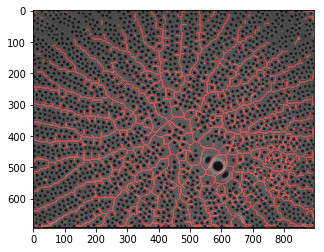

In [33]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild016.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

In [34]:
from PIL import Image
im=Image.open('cropped_Wild016.tif')
width, height=im.size

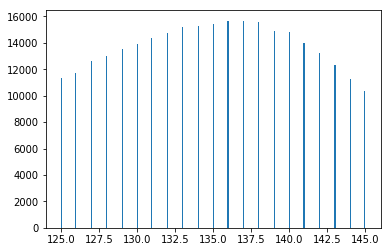

[130 121 126 123 122 125 123 116 121 124 120 116 126 121 123 119 125 111
 110 129 126 138 134 134 137 130 114 106  91  89  93 107 122 132 132 133
 130 131 120 123 121 128 114 132 143 140 148 140 142 129 105 101  94 102
 116 130 151 156 149 145 146 135 141 127 134 139 144 148 136 145 132 131
 128 139 135 132 130 131 117 105  88  84  90  96 112 131 128 135 131 119
 121 117 111 111 110 104 105 109 116 115 114 116 113 112 116 119 109 118
 103 112 112 114 110 111 114 109 122 124 126 116 116 112 105 103 112  95
 100  97 101 105 115 117 114 113 118 104 110 114 115 112 122 120 134 124
 131 120 121 125 115 126 124 121 125 122 133 136 134 139 131 113 104  99
 103 110  92 111 107 110 121 114 113 123 112 129 112 117 114 107  88  87
  62  33  27  31  55  72 107 111 115 126 127 117 120 109 118 120 118 112
 115 110 107 122 117 117 127 128 120 111 106 101 103 108 120 120 125 128
 123 121 119 125 117 109  88  70  33  21  11  14  23  43  64  75  93 100
 112 110 111 110 111 113 116 120 117 120 117 117 11

In [90]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild016.tif',0)
plt.hist(img.ravel(),256,[125,145])
plt.show()

np.mean(img)

mode=img[0,:]
print(mode)

In [91]:
import statistics
statistics.mode(mode)

117

In [36]:
partialstd=(np.std(img)/2)
lower=np.mean(img)-partialstd
print("lower =",lower)
upper=np.mean(img)+partialstd
print("upper =",upper)

lower = 98.17068158745775
upper = 134.45419937299368


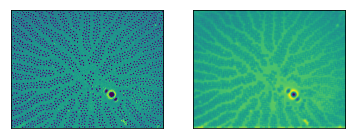

True

In [55]:
#dilating the blurred image
from skimage.morphology import dilation
dilated_img=dilation(img)
image=plt.subplot()
image.imshow(dilated_img)

blur = cv2.blur(dilated_img,(17, 17))
plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
np.shape(blur)




cv2.imwrite('blur_Wild016.tif',blur)

In [58]:
from skimage.filters import threshold_otsu
thres=threshold_otsu(blur)
print(thres)


129


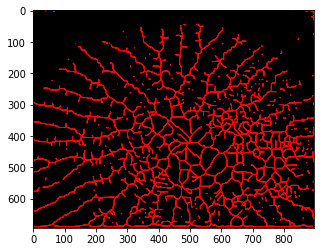

In [61]:
thresh = blur[:,:] > thres

from skimage.morphology import skeletonize
blurskeleton = skeletonize(thresh)
ax = plt.subplot()

 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(blurskeleton, cmap=red2, interpolation= 'bilinear')

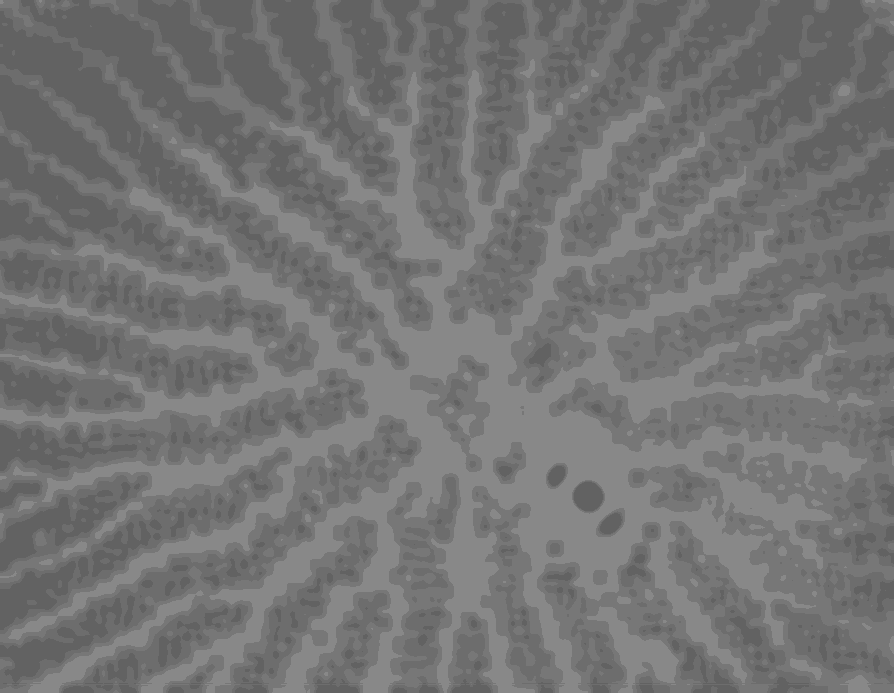

In [57]:
blurim.quantize(4,0)

<PIL.Image.Image image mode=P size=894x693 at 0x1C23E8F780>


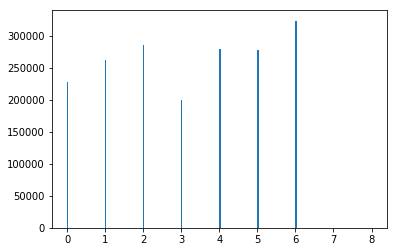

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [50]:
blurim=Image.open('blur_Wild016.tif')
image=blurim.quantize(7,0)
image.save('simple_Wild016.tif')
print(image)
newimg = cv2.imread('simple_Wild016.tif')
plt.hist(newimg.ravel(),256,[0,8]); plt.show()
print(newimg)

/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


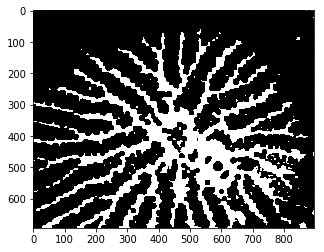

In [39]:
newimg[np.where(newimg == [0])] = [255]
newimg[np.where(newimg == [2])] = [0]
newimg[np.where(newimg == [])] = [255]
newimg[np.where(newimg == [])] = [0]
plt.imshow(newimg, cmap='gray')

In [40]:
from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)
print(newimg)
np.shape(newimg)

1
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 894, 3) looks like an RGB image
  warn(msg.format(image.shape))


(693, 894, 3)

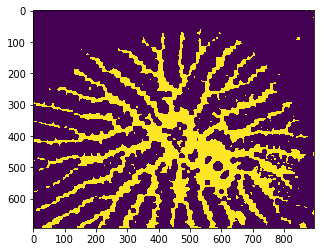

In [41]:
threshold = newimg[:,:,0] > th
plt.imshow(threshold)

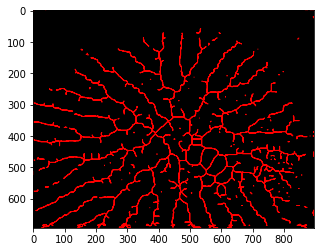

In [42]:
from skimage.morphology import skeletonize
skeleton = skeletonize(threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')